# Assignment 03


- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Predictive Analytics
- Course ID: BDM500NAA.05379.2237
- Professor: Dr. Tamanna Eini Keleshteri

<b>All my observations are highlighted by <font color='limegreen'>this color</font> and comment out in the code.</b>

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as ex

### Part 1

- Data Source: U.S. Bureau of Labor Statistics, Unemployment Rate in Portland-Vancouver-Hillsboro, OR-WA (MSA) [PORT941UR], retrieved from FRED, Federal Reserve Bank of St. Louis.
- Data Link: https://fred.stlouisfed.org/series/PORT941UR
- Retreive Date: Nov 16. 2023

In [23]:
# load the original dataset
df = pd.read_csv('PORT941UR.csv')
df.head()

,DATE,PORT941UR
0,1990-01-01,4.1
1,1990-02-01,4.1
2,1990-03-01,4.1
3,1990-04-01,4.1
4,1990-05-01,4.2


In [24]:
# change the data to the recent 20 years period (2000-2020)
condition = (df['DATE'] >= '2000-01-01') & (df['DATE'] <= '2020=12-31')
df = df[condition].reset_index(drop=True)
df.info()

# we can confirm no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       252 non-null    object 
 1   PORT941UR  252 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [25]:
# rename the column 
df.rename(columns={'DATE': 'date', 'PORT941UR': 'local'}, inplace=True)
df.head()

,date,local
0,2000-01-01,4.4
1,2000-02-01,4.4
2,2000-03-01,4.4
3,2000-04-01,4.4
4,2000-05-01,4.5


In [28]:
# change 'date' column to the datetime type
df['date'] = pd.to_datetime(df['date'])

# create year and month columns (dtype: int)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# change the order of columns
df = df[['date', 'year', 'month', 'local']]
df.head()

,date,year,month,local
0,2000-01-01,2000,1,4.4
1,2000-02-01,2000,2,4.4
2,2000-03-01,2000,3,4.4
3,2000-04-01,2000,4,4.4
4,2000-05-01,2000,5,4.5


Text(0.5, 1.0, 'Local Unemployment Rate in 2000-2020')

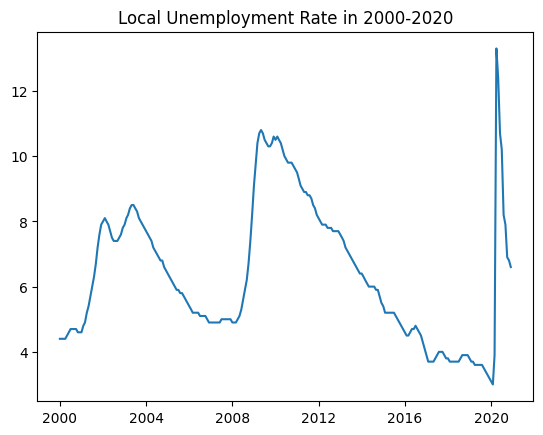

In [38]:
# plotting the data
plt.plot(df['date'], df['local'])
plt.title('Local Unemployment Rate in 2000-2020')

<font color='limegreen'>

<b>Observations</b>:

- The graph shows that there are three big spikes of the unemployment rate.
- The first wave started in 2001 and gradually declined until around 2006, which was likely to be caused by the burst of the Internet (dot com) bubble. 
- The second spike (jumpped the rate from 2008) and  was driven by the Global Financial Crisis, which might have been triggered by the bankruptcy of the lehman brothers.
- The last significant steep surge was caused by the global pandemic and the recession.
- All in all, every unemployment waves are related to the historical economic shocks.


- In terms of the trend, we won't be able to find the up- or down-trend from the graph above.
- However, the spike in the unemployment rate (in other words, the economic shocks or burst of the bubbles) might be cyclical; once a 8~10 years.
- So, the next global economic catastrophe or the huge financial shocks may happen around 2030.

</font>

### Part 2

- U.S. Bureau of Labor Statistics, Unemployment Rate [UNRATE], retrieved from FRED, Federal Reserve Bank of St. Louis
- Data Link: https://fred.stlouisfed.org/series/UNRATE
- Retreive Date: Nov 17. 2023

In [31]:
# load the dataset
national = pd.read_csv('UNRATE.csv')
national.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [36]:
# change column names
national.rename(columns={'DATE': 'date', 'UNRATE': 'national'}, inplace=True)
# change dtype of 'date'
national['date'] = pd.to_datetime(national['date'])

# match the date ranges as the 'local' df
df = pd.merge(df, national, how='inner', on='date')
df.head()

,date,year,month,local,national
0,2000-01-01,2000,1,4.4,4.0
1,2000-02-01,2000,2,4.4,4.1
2,2000-03-01,2000,3,4.4,4.0
3,2000-04-01,2000,4,4.4,3.8
4,2000-05-01,2000,5,4.5,4.0


Text(0.5, 1.0, 'National Unemployment Rate in 2000-2020')

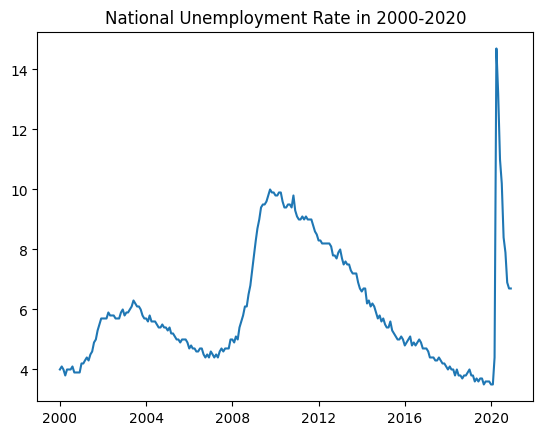

In [37]:
# plotting the national data
plt.plot(df['date'], df['national'])
plt.title("National Unemployment Rate in 2000-2020")

<font color='limegreen'>

<b>Observations</b>:

- The national unemployment rate also shows three big spikes of the unemployment rate.
- An unique behavior is that the top of each spike is gradually increasing; for example, the first ~ third waves were topped around 6%, 10%, and 14%, respectively.


</font>

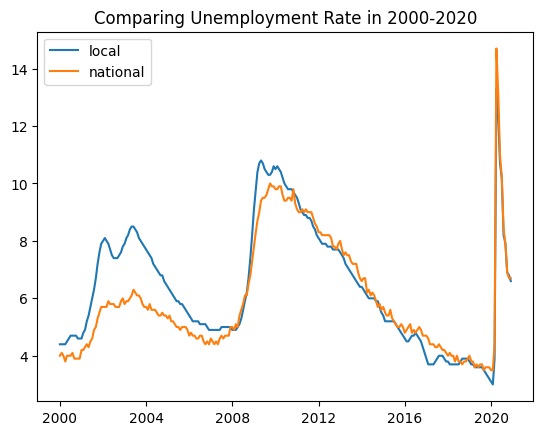

In [40]:
# compare the local and national unemployment rate
plt.plot(df['date'], df['local'], label='local')
plt.plot(df['date'], df['national'], label='national')
plt.title("Comparing Unemployment Rate in 2000-2020")
plt.legend()

<font color='limegreen'>

<b>Observations</b>:

- The graph shows both the local (the Portland-Hillsboro-Vancouver area) and the national unemployment rate in the US.
- In the first and second wave, the unemployment rate in the local area was relatively higher than the national data.
- On the other hand, in the third wave, the ratio of jobless people in the local area was almost the same as the national rate.

- Here are the possible causes or backgrounds about the unemployment rate gaps between the local area and the nation;
    - Age; if the average age in the local area is younger than the national average, the unemployment rate might be higher; considering that the less skilled people are likely to be laid off in the economic shocks earlier than the older ones with high skills.
    - Industry: in each economic shock, the most negatively affected industries must have been different; for example, if more small- or mid-technology companies were located in the local area in 2001, we figure out why the unemployment rate is higher than the national one.
    - Work Style: the gap unemployment rate between the local and the national is expected to shrink as the remote working style is more popularized.

</font>

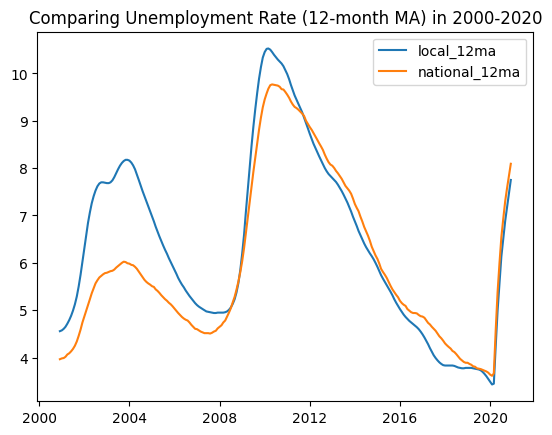

In [44]:
# apply the moving averages
df['local_12ma'] = df['local'].rolling(window=12).mean()
df['national_12ma'] = df['national'].rolling(window=12).mean()

plt.plot(df['date'], df['local_12ma'], label='local_12ma')
plt.plot(df['date'], df['national_12ma'], label='national_12ma')
plt.title("Comparing Unemployment Rate (12-month MA) in 2000-2020")
plt.legend()

<font color='limegreen'>

<b>Observations</b>:

- The graph shows the twelve months moving average of the unemployment rate for both the local area and the national in the US.
- Due to applying the moving averages to the data, a lot of small fluctuations are smooth.
- Also, we can grasp the trend changes by smoothing technique; for example, the second wave started in 2008 because the slope (drawing the linear line connecting two consecutive months) changed to the positive.


- The need for smoothing the plots would depend on the purposes;
    - If we want to confirm the clear trend changes, we should use smoothing techniques; for example, although the unemployment rate rose by 0.3% compared to the previous month, it may not show the current trend changes; it could be caused by temporal events, such as natural disasters and large strikes.
    - On the other hand, if we would like to detect unexpected behavior based on the fluctuations as early as possible, we should not apply the smoothing technique.
    - In other words, applying the smoothing technique causes tradeoff.

</font>

In [91]:
# predict unemployment rate on December 2022

# (1): trend component (T);
#  12-month moving average has already calculated


# (2): seasonal component (S);
#  calculate normlized monthly averages (seasonal seasonal component) 
seasonal_comp = {}
for data in ['local', 'national']:
    # average in each month
    each_month_avg = df.groupby('month').mean()[data].values
    # ground aeverage
    ground_month_avg = np.mean(each_month_avg)
    # devide each month average by the ground average
    seasonal_comp[data] = each_month_avg / ground_month_avg
#  show seasonal component
#print(seasonal_comp)

# (3): Irregular component (I):
#  create function to apply seasonal component
def apply_seasonal_index(row, data):
    # get index of seasonal norm_month_avg
    idx = row['month'] - 1
    data_f = data.split('_')[0]
    return row[data] * seasonal_comp[data_f][idx]

#  apply each seasonal index to the corresponding original data
local_ts = df.apply(lambda row: apply_seasonal_index(row, 'local_12ma'), axis=1)
national_ts = df.apply(lambda row: apply_seasonal_index(row, 'national_12ma'), axis=1)

df['local_irreg'] = df['local'] / local_ts
df['national_irreg'] = df['national'] / national_ts

df.tail(10)

,date,year,month,local,national,local_12ma,national_12ma,local_irreg,national_irreg
242,2020-03-01,2020,3,3.9,4.4,3.450000,3.666667,1.161932,1.235627
243,2020-04-01,2020,4,13.3,14.7,4.258333,4.591667,2.992313,3.042347
244,2020-05-01,2020,5,12.4,13.2,4.991667,5.383333,2.400559,2.356875
245,2020-06-01,2020,6,10.7,11.0,5.583333,6.000000,1.877660,1.788176
246,2020-07-01,2020,7,10.2,10.2,6.133333,6.541667,1.634188,1.532720
247,2020-08-01,2020,8,8.2,8.4,6.516667,6.933333,1.254879,1.206023
248,2020-09-01,2020,9,7.9,7.9,6.883333,7.300000,1.149701,1.088468
249,2020-10-01,2020,10,6.9,6.9,7.175000,7.575000,0.968416,0.921334
250,2020-11-01,2020,11,6.8,6.7,7.466667,7.833333,0.919865,0.865125
251,2020-12-01,2020,12,6.6,6.7,7.750000,8.091667,0.861468,0.838179
